In [1]:
# This is an example of the comparison of data cubes using the HOG technique
#
# Prepared by Juan D. Soler (soler@mpia.de)

import sys
sys.path.append('../')
from astrohog import *

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from astropy.io import fits

from scipy import ndimage

In [2]:
# Load the cubes that you plan to compare
# Just for reference, I assume that the first index runs over the non-spatial coordinate
# Also assume that the cubes are spatially aligned and are reprojected into the same grid 

hdul = fits.open('../data/testcube1.fits')
cube1=hdul[0].data
hdul.close()
hdul = fits.open('../data/testcube2.fits')
cube2=hdul[0].data
hdul.close()


In [25]:
# Here you select the size of your derivative kernel in pixels
ksz=10

In [26]:
# Here I define the masks for both cubes
# For the sake of simplicity, I'm only masking the edges of the cubes
sz1=np.shape(cube1)
mask1=1.+0.*cube1
mask1[:,0:ksz,:]=0.
mask1[:,sz1[1]-1-ksz:sz1[1]-1,:]=0.
mask1[:,:,0:ksz]=0.
mask1[:,:,sz1[2]-1-ksz:sz1[2]-1]=0.
sz2=np.shape(cube2)
mask2=1.+0.*cube2
mask2[:,0:ksz,:]=0.
mask2[:,sz2[1]-1-ksz:sz2[1]-1,:]=0.
mask2[:,:,0:ksz]=0.
mask2[:,:,sz2[2]-1-ksz:sz2[2]-1]=0.


In [27]:
# Here you define the channel ranges over which you want to compare the cubes
zmin1=0
zmax1=sz1[0]-1
zmin2=0
zmax2=sz2[0]-1

In [28]:
# Run the HOG
corrplane, corrcube, scube1, scube2 =HOGcorr_cube(cube1, cube2, zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2)

Computing HOG correlation
6 6
0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5


In [29]:
# The outputs are: 
# 1. 'corrplane' an array with all of the metrics to evaluate the correlation between the cubes
np.shape(corrplane)

(9, 6, 6)

In [30]:
# 2. 'corrcube', which is the array containing all the relative orientation angles between gradients
np.shape(corrcube)

(6, 6, 768, 1024)

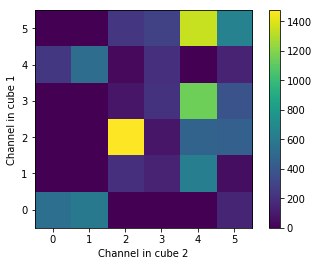

In [31]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.
vplane =corrplane[2]
im=plt.imshow(vplane,origin='lower',clim=[0.,np.max(vplane)],interpolation='None')
plt.xlabel('Channel in cube 2')
plt.ylabel('Channel in cube 1')
clb=plt.colorbar(im)
cb1.set_label(r'$V$ [deg]')
plt.show()

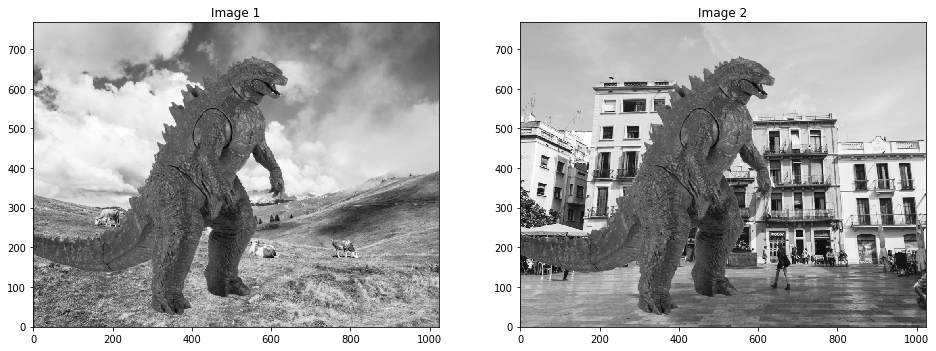

In [32]:
# Plot the pair of channels with the highest spatial correlations
indmax1, indmax2 =(vplane == np.max(vplane)).nonzero()

fig, ax = plt.subplots(1,2, figsize=(16., 12.))
ax[0].imshow(cube1[indmax1[0],:,:], origin='lower', cmap='Greys_r')
ax[0].set_title('Image 1')
ax[1].imshow(cube2[indmax2[0],:,:], origin='lower', cmap='Greys_r')
ax[1].set_title('Image 2')
plt.show()


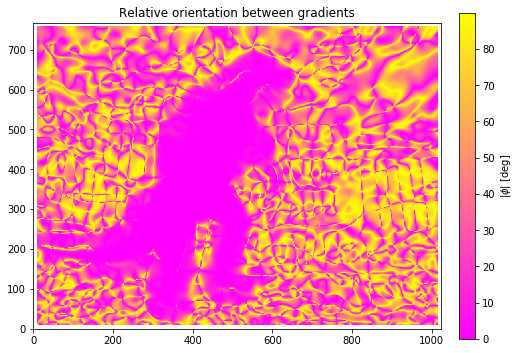

In [33]:
fig, ax = plt.subplots(1,1, figsize=(8., 6.))
im=plt.imshow(np.abs(corrcube[indmax1[0],indmax2[0],:,:])*180.0/np.pi, origin='lower', cmap='spring',interpolation='None')
cb1=plt.colorbar(im,fraction=0.046, pad=0.04)
cb1.set_label(r'$|\phi|$ [deg]')
ax.set_title('Relative orientation between gradients')
plt.show()